In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



#plt.style.use('ggplot')
np.random.seed(42)
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
X = np.vstack((x, y)).T

In [2]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

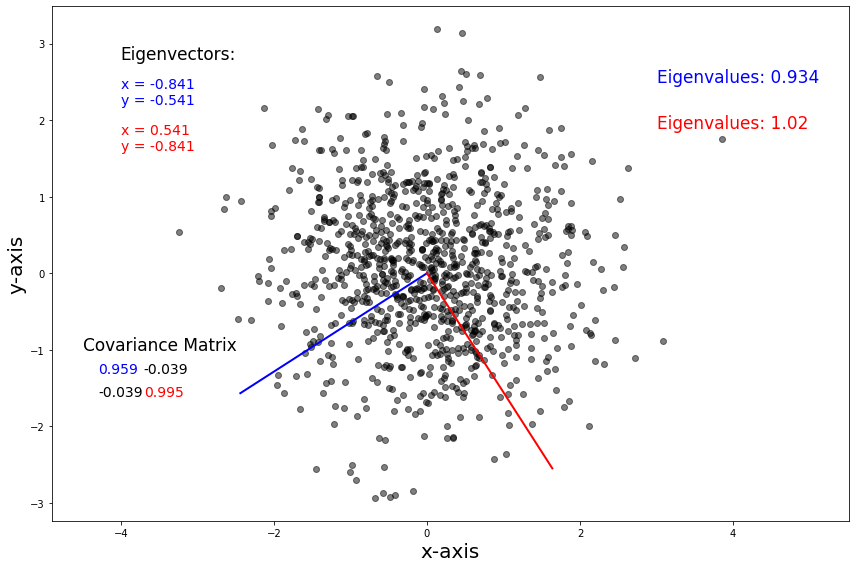

In [3]:
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (12, 8)


C1 = cov_mat(X.T)
eVe, eVa = np.linalg.eig(C1)
i = 0
colors = ['b', 'r']
plt.scatter(X[:, 0], X[:, 1], c='k',alpha=0.5)
for e, v, c in zip(eVe, eVa.T, colors):

    plt.text(3, 2.5 - i*1.2, f'Eigenvalues: {round(e,3)}', {'color': c, 'fontsize': 17})

    plt.text(-4, 2 - i*1.2, f'x = {round(v[0],3)} \ny = {round(v[1],3)} \n', {'color': c, 'fontsize': 14})
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], c, lw=2)
    i = 0.5

plt.text(-4, 2.8 , 'Eigenvectors:', {'color': 'k', 'fontsize': 17})
plt.text(-4.5,-1, 'Covariance Matrix', {'color': 'k', 'fontsize': 17})

j=0
for c, covar in zip(colors,C1):
    if j == 0:
        plt.text(-4.3,-1.3- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': c, 'fontsize': 14})
        plt.text(-3.7,-1.3- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': 'k', 'fontsize': 14})
        
    else:
        plt.text(-4.3,-1.3- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': 'k', 'fontsize': 14})
        plt.text(-3.7,-1.3- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': c, 'fontsize': 14})
    j=0.3

plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig('pca_normal.png', format = 'png')

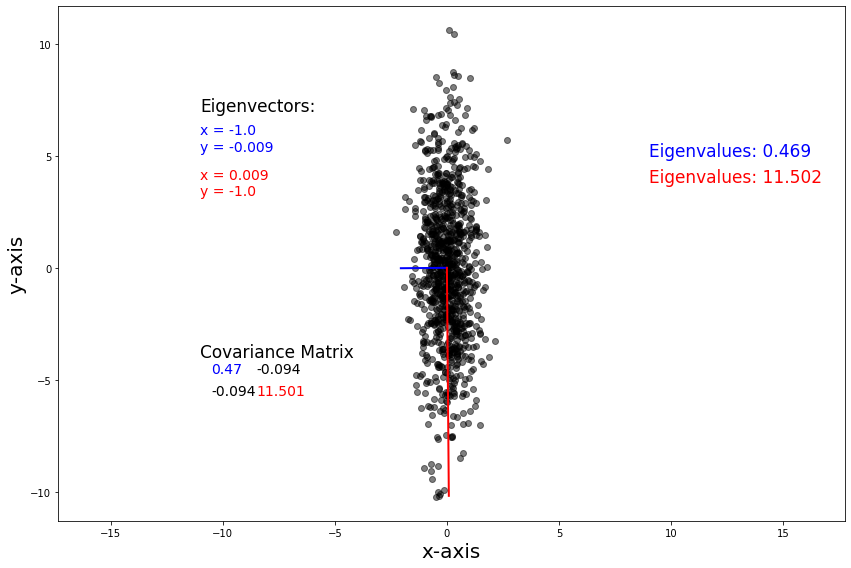

In [4]:

# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

C2 = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C2)
i = 0
colors = ['b', 'r']
plt.scatter(Y[:, 0], Y[:, 1], c='k',alpha=0.5)

for e, v, c in zip(eVe, eVa.T, colors):
    plt.text(9, 5 - i*1.2, f'Eigenvalues: {round(e,3)}', {'color': c, 'fontsize': 17})
    plt.text(-11, 4.5 - i*2, f'x = {round(v[0],3)} \ny = {round(v[1],3)} \n', {'color': c, 'fontsize': 14})
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], c, lw=2)

    i = 1
    
plt.text(-11, 7, 'Eigenvectors:', {'color': 'k', 'fontsize': 17})
plt.text(-11,-4, 'Covariance Matrix', {'color': 'k', 'fontsize': 17})

j=0
for c, covar in zip(colors,C2):
    if j == 0:
        plt.text(-10.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': c, 'fontsize': 14})
        plt.text(-8.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': 'k', 'fontsize': 14})
        
    else:
        plt.text(-10.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': 'k', 'fontsize': 14})
        plt.text(-8.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': c, 'fontsize': 14})
    j=1
plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig('pca_axis_y.png', format = 'png')

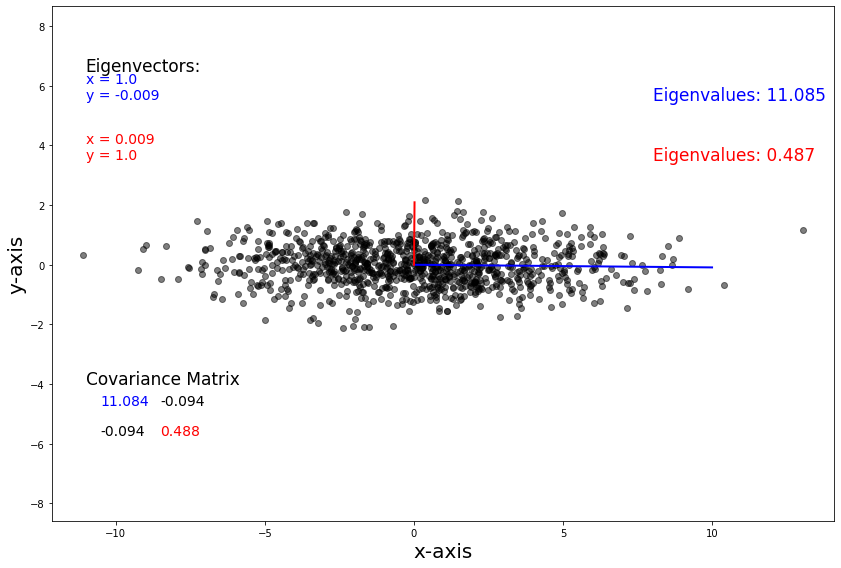

In [5]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 3.4, 0.7
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

C3 = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C3)

i = 0
colors = ['b', 'r']
plt.scatter(Y[:, 0], Y[:, 1], c='k',alpha=0.5)

for e, v, c in zip(eVe, eVa.T, colors):
    plt.text(8, 5.5 - i*2, f'Eigenvalues: {round(e,3)}', {'color': c, 'fontsize': 17})
    plt.text(-11, 5 - i*2, f'x = {round(v[0],3)} \ny = {round(v[1],3)} \n', {'color': c, 'fontsize': 14})
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], c, lw=2)   
    

    i = 1

plt.text(-11, 6.5, 'Eigenvectors:', {'color': 'k', 'fontsize': 17})
plt.text(-11,-4, 'Covariance Matrix', {'color': 'k', 'fontsize': 17})

j=0
for c, covar in zip(colors,C3):
    if j == 0:
        plt.text(-10.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': c, 'fontsize': 14})
        plt.text(-8.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': 'k', 'fontsize': 14})
        
    else:
        plt.text(-10.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': 'k', 'fontsize': 14})
        plt.text(-8.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': c, 'fontsize': 14})
    j=1

plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig('pca_axis_x.png', format = 'png')

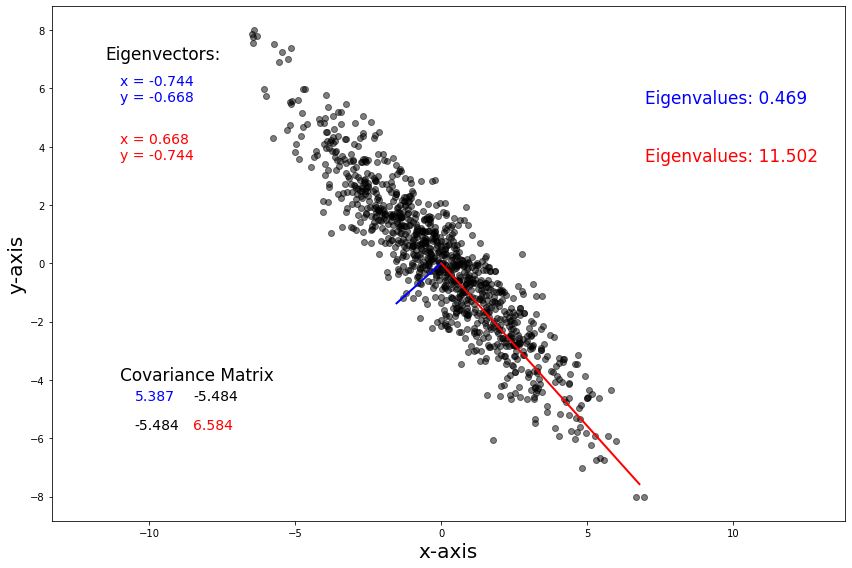

In [6]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

C4 = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C4)

i = 0
colors = ['b', 'r']
plt.scatter(Y[:, 0], Y[:, 1], c='k',alpha=0.5)

for e, v, c in zip(eVe, eVa.T, colors):
    plt.text(7, 5.5 - i*2, f'Eigenvalues: {round(e,3)}', {'color': c, 'fontsize': 17})
    plt.text(-11, 5 - i*2, f'x = {round(v[0],3)} \ny = {round(v[1],3)} \n', {'color': c, 'fontsize': 14})
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], c, lw=2)    
    i = 1

plt.text(-11.5, 7, 'Eigenvectors:', {'color': 'k', 'fontsize': 17})
plt.text(-11,-4, 'Covariance Matrix', {'color': 'k', 'fontsize': 17})
j=0
for c, covar in zip(colors,C4):
    if j == 0:
        plt.text(-10.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': c, 'fontsize': 14})
        plt.text(-8.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': 'k', 'fontsize': 14})
        
    else:
        plt.text(-10.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[0]}', {'color': 'k', 'fontsize': 14})
        plt.text(-8.5,-4.7- j, f'{list(map(lambda x: round(x,3), covar))[1]}', {'color': c, 'fontsize': 14})
    j=1

plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig('pca_rotated.png', format = 'png')